In [193]:
# Imports
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import classification_report, accuracy_score, mean_squared_error
import matplotlib.pyplot as plt

In [194]:
# Charger et trier les données
data = pd.read_csv("DataSet_Final.csv", sep=';')
#display(data.head(10))
X = data.drop(["Nom", "Code du département", "Libellé du département",'Prénom',"% Voix/Exp","Voix"], axis=1)

departements = ['Loire-Atlantique', 'Maine-et-Loire', 'Mayenne', 'Sarthe', 'Vendée']
labels = ['% Voix/Exp']
candidats = ["Nom"]
# Sélectionner les caractéristiques à utiliser
y1 = data[labels].values
y2 = data[candidats].values
#display(X)

X_dev = X[data['Libellé du département'].isin(departements)]
y1_dev = y1[data['Libellé du département'].isin(departements)]
y2_dev = y2[data['Libellé du département'].isin(departements)]


X_train = X[~data['Libellé du département'].isin(departements)]
y1_train = y1[~data['Libellé du département'].isin(departements)]
y2_train = y2[~data['Libellé du département'].isin(departements)]

In [195]:
number_of_iterations = 10
rmse = []
accuracy = []
modelRegression = GradientBoostingRegressor(n_estimators=300, max_depth=6, loss='absolute_error')
modelClassifier = RandomForestClassifier(n_estimators=200, random_state=42)

# Fit the model to the current bootstrap sample
modelRegression.fit(X_train, y1_train.ravel())  # Fit for Y1
# Use model.predict() or other evaluation steps as needed

modelClassifier.fit(X_train, y2_train.ravel())  # Fit for Y2
# Use model.predict() or other evaluation steps as needed

y_pred = modelRegression.predict(X_dev)
y_name_pred = modelClassifier.predict(X_dev)

rmse.append(np.sqrt(mean_squared_error(y1_dev, y_pred)))
                
accuracy.append(accuracy_score(y2_dev, y_name_pred))

# Créer un DataFrame avec les résultats
results = pd.DataFrame({
    'RMSE': sum(rmse),
    'Accuracy': sum(accuracy),
    'Libellé du département': data['Libellé du département'][data['Libellé du département'].isin(departements)],
    'Candidat prédit': y_name_pred,
    'Voix prédit': y_pred
})

# Afficher les résultats
print(results)


        RMSE  Accuracy Libellé du département Candidat prédit  Voix prédit
42  5.195459       1.0       Loire-Atlantique          MACRON    28.805735
47  5.195459       1.0         Maine-et-Loire          MACRON    29.944427
51  5.195459       1.0                Mayenne          MACRON    28.513922
70  5.195459       1.0                 Sarthe          MACRON    28.031519
83  5.195459       1.0                 Vendée          MACRON    30.091862


In [196]:
import matplotlib.pyplot as plt

# Créer une liste pour les positions des barres
positions = range(len(departements))

# Créer une liste pour les noms des départements
labels_departements = [f"{department}" for department in departements]
# Créer une liste pour les noms des candidats prédits
labels_candidats = y_name_pred.tolist()

# Créer une liste pour les taux de pauvreté
taux_de_pauvrete = []

# Parcourir chaque département
for department in departements:
    # Filtrer les données pour le département spécifié
    filtered_data = data[data['Libellé du département'] == department]

    # Récupérer le taux de pauvreté pour le département spécifié
    # taux_de_pauvrete.append(filtered_data['taux_de_pauvrete_en_2021'].iloc[0])

# Créer le diagramme à barres
#plt.figure(figsize=(12, 6))
#plt.bar(positions, taux_de_pauvrete)

# Ajouter les étiquettes pour les départements et les candidats prédits
#for i, position in enumerate(positions):
    #plt.text(position, taux_de_pauvrete[i] + 0.1, labels_departements[i], ha='center')
    #plt.text(position, taux_de_pauvrete[i] - 1, labels_candidats[i], ha='center')

# Configurer les axes et le titre
#plt.xticks(positions, labels_departements)
#plt.xlabel("Département")
#plt.ylabel("Taux de pauvreté en 2021")
#plt.title("Taux de pauvreté en 2021 par département et candidat prédit")

# Afficher le diagramme
#plt.show()


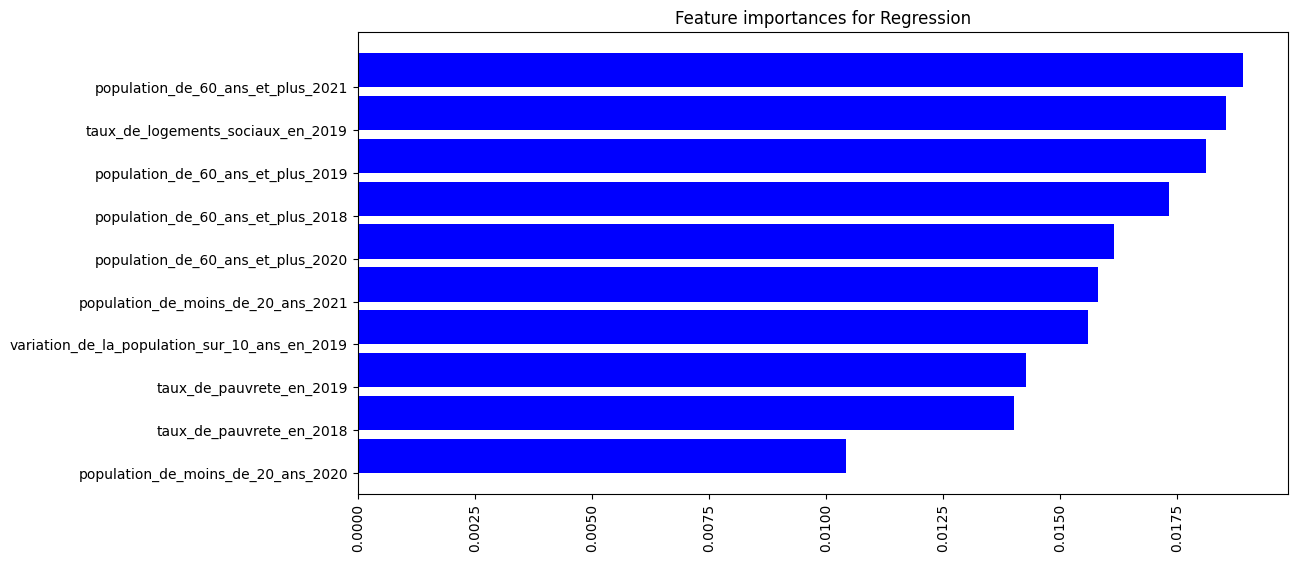

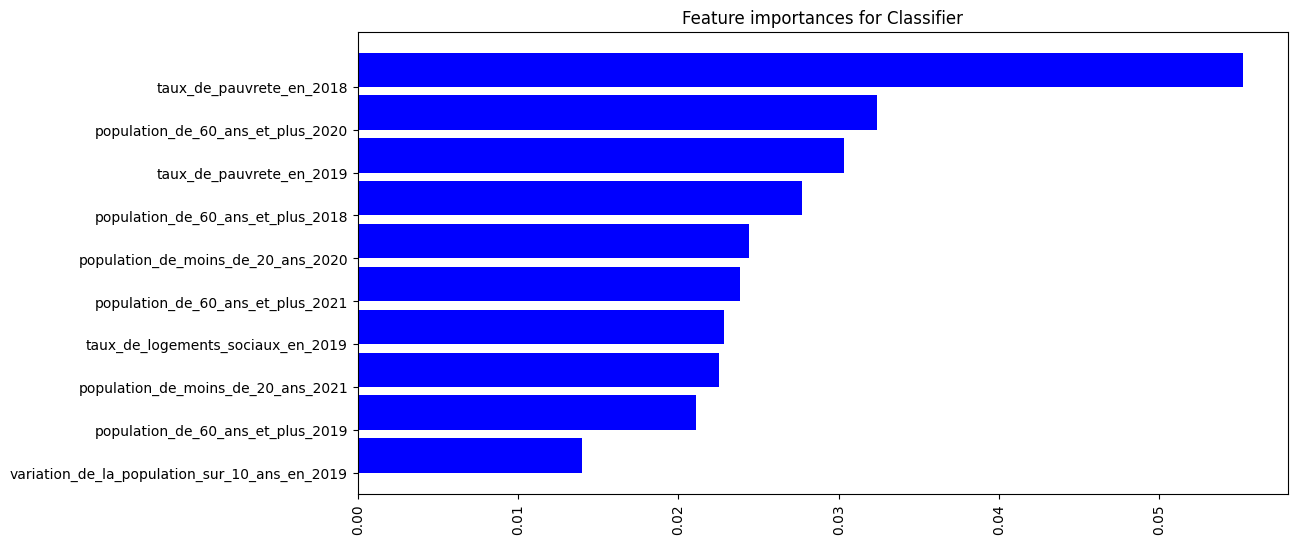

In [197]:
# Pour afficher un graphique des importances des caractéristiques triées

# Obtenir les importances des caractéristiques
regressionImportances = modelRegression.feature_importances_
classifierImportances = modelClassifier.feature_importances_

# Créer un DataFrame pour les afficher
feature_importances = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance Regression': regressionImportances,
    'Importance Classifier': classifierImportances
})

# Trier les importances des caractéristiques par ordre croissant
feature_importances.sort_values(by=['Importance Regression'], inplace=True)
feature_importances.sort_values(by=['Importance Classifier'], inplace=True)
feature_importances = feature_importances.sort_values('Importance Regression', ascending=False)
# Afficher les importances des caractéristiques triées
#print(feature_importances)



feature_importances = feature_importances.sort_values('Importance Regression', ascending=True)
feature_importances = feature_importances.head(10)

plt.figure(figsize=(12, 6))
plt.title("Feature importances for Regression")
plt.barh( feature_importances['Feature'], feature_importances['Importance Regression'], color='b', align="edge")
plt.xticks(rotation=90)
plt.show()

feature_importances = feature_importances.sort_values('Importance Classifier', ascending=True)
feature_importances = feature_importances.head(10)

plt.figure(figsize=(12, 6))
plt.title("Feature importances for Classifier")
plt.barh( feature_importances['Feature'], feature_importances['Importance Classifier'], color='b', align="edge")
plt.xticks(rotation=90)
plt.show()

[12.0, 5.0, 0.0, 0.0, 9.0]

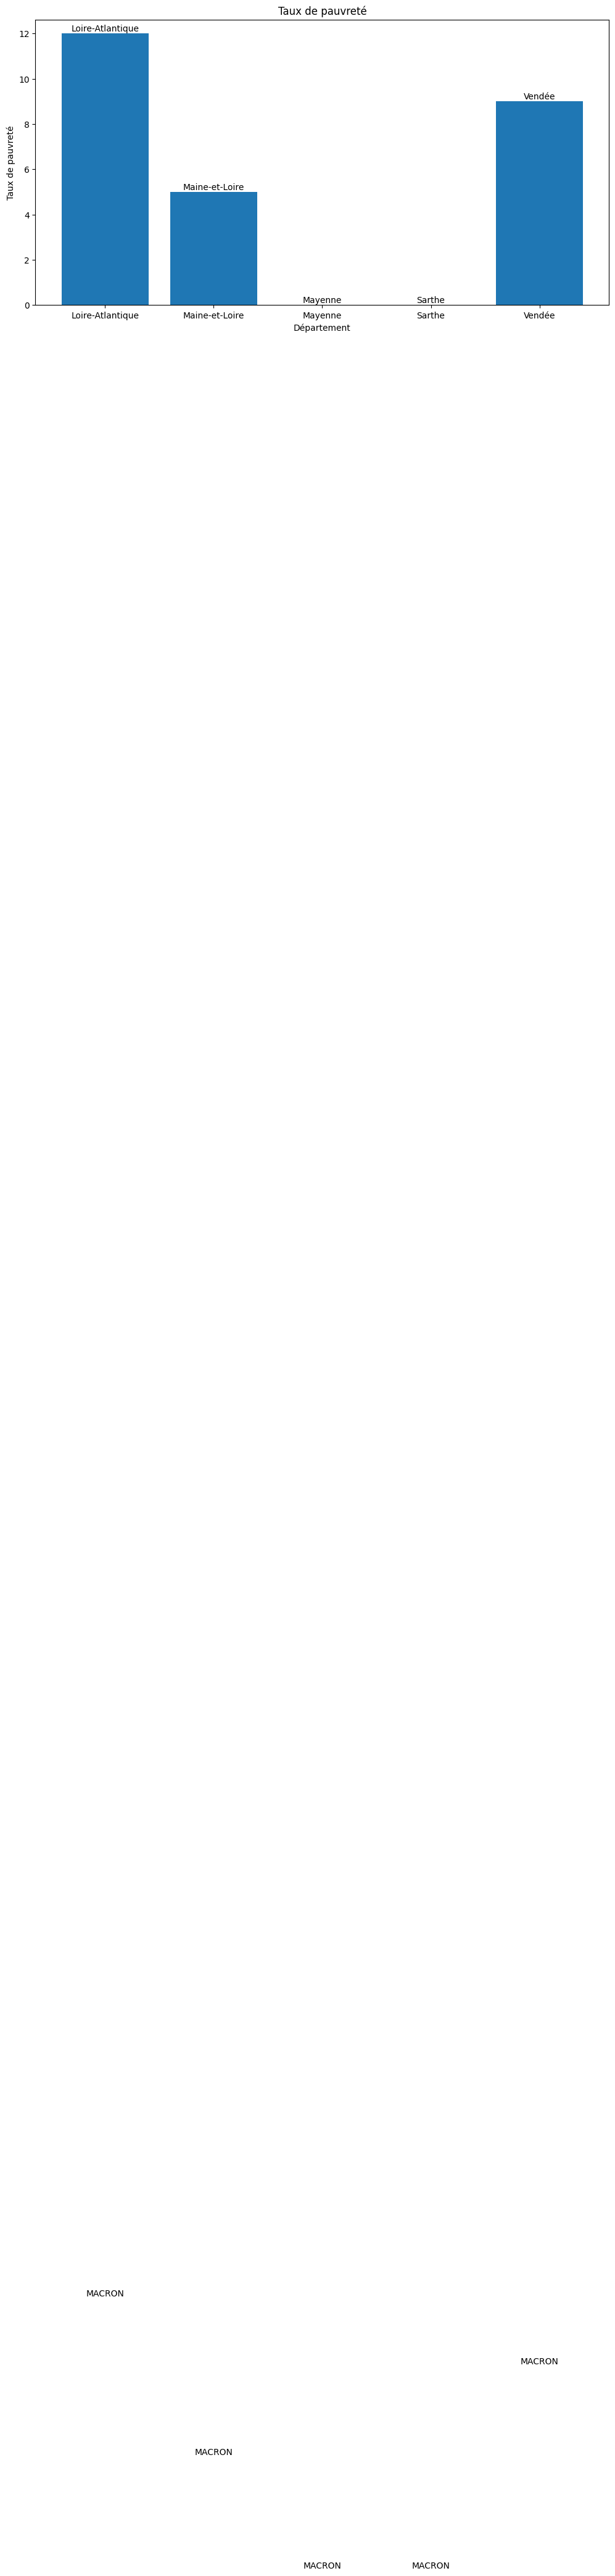

In [198]:
import matplotlib.pyplot as plt

# A refaire par rapport aux features les plus importzntes

# Créer une liste pour les positions des barres
top_feature = (feature_importances.head(1).Feature.values[0])
# Créer une liste pour les noms des départements
labels_departements = [f"{department}" for department in departements]

# Créer une liste pour les noms des candidats prédits
labels_candidats = y_name_pred.tolist()

# Créer une liste pour les taux de pauvreté
most_imp_feature = []

# Parcourir chaque département
for department in departements:
    # Filtrer les données pour le département spécifié
    filtered_data = data[data['Libellé du département'] == department]
    # Récupérer le taux de pauvreté pour le département spécifié
    #if (filtered_data[top_feature].iloc[0] > 0) :
    most_imp_feature.append(filtered_data[top_feature].iloc[0])
    
positions = range(len(departements))

display(most_imp_feature)
# Créer le diagramme à barres
plt.figure(figsize=(12, 6))
plt.bar(positions, most_imp_feature)

# Ajouter les étiquettes pour les départements et les candidats prédits
for i, position in enumerate(positions):
    plt.text(position, most_imp_feature[i] + 0.1, labels_departements[i], ha='center')
    plt.text(position, most_imp_feature[i] - 100, labels_candidats[i], ha='center')

# Configurer les axes et le titre
plt.xticks(positions, labels_departements)
plt.xlabel("Département")
plt.ylabel("Taux de pauvreté")
plt.title("Taux de pauvreté")

# Afficher le diagramme
plt.show()


Text(0, 0.5, 'Number of Departments Won')

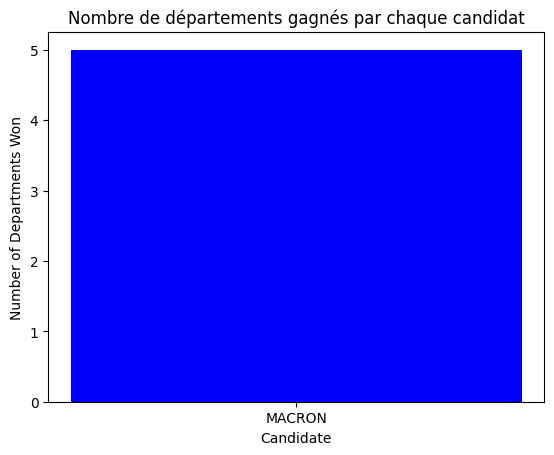

In [199]:
import matplotlib.pyplot as plt

# Compter le nombre de départements gagnés par chaque candidats
candidate_counts = results['Candidat prédit'].value_counts()

# Definir une couleur
colors = ['blue', 'green', 'red', 'purple', 'orange']

# Créer le diagramme de barres
plt.bar(candidate_counts.index, candidate_counts.values, color=colors)

# Labelliser les axes
plt.title('Nombre de départements gagnés par chaque candidat')
plt.xlabel('Candidate')
plt.ylabel('Number of Departments Won')

In [200]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import label_binarize

import warnings
from sklearn.exceptions import UndefinedMetricWarning

# Supprimer les avertissements
warnings.filterwarnings("ignore", category=UndefinedMetricWarning)

# Calculer la matrice de confusion
cm = confusion_matrix(y1_departments, y1_pred_departments)
labels_uniques = np.unique(np.concatenate((y1_departments, y1_pred_departments)))
affichage = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels_uniques)
affichage.plot()

# Binariser la sortie pour ROC multiclasse
y_vrai_bin = label_binarize(y1_departments, classes=labels_uniques)
y_pred_bin = label_binarize(y1_pred_departments, classes=labels_uniques)

# Calculer la courbe ROC et l'aire sous la courbe pour une moyenne micro
taux_fp = dict()  # taux de faux positifs
taux_vp = dict()  # taux de vrais positifs
aire_sous_courbe = dict()  # aire sous la courbe ROC

taux_fp["micro"], taux_vp["micro"], _ = roc_curve(y_vrai_bin.ravel(), y_pred_bin.ravel())
aire_sous_courbe["micro"] = auc(taux_fp["micro"], taux_vp["micro"])

# Tracer la courbe ROC pour une moyenne micro
plt.figure()
lw = 2
plt.plot(taux_fp["micro"], taux_vp["micro"], color='darkorange',
         lw=lw, label='Courbe ROC moyenne micro (aire = {0:0.2f})'
               ''.format(aire_sous_courbe["micro"]))
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taux de faux positifs')
plt.ylabel('Taux de vrais positifs')
plt.title('Courbe caractéristique de fonctionnement du récepteur')
plt.legend(loc="lower right")
plt.show()




NameError: name 'y1_departments' is not defined

In [ ]:
number_of_iterations = 10
rmse = []
accuracy = []
modelRegression = GradientBoostingRegressor(n_estimators=300, max_depth=6, loss='absolute_error')
modelClassifier = RandomForestClassifier(n_estimators=200, random_state=42)

# Fit your model to each bootstrap sample
for i in range(number_of_iterations):
    # Resample the data indices with replacement
    indices = np.random.choice(len(X_train), size=len(X_train), replace=True)
    
    # Il faudrait faire cela puis split en pleins de petits samples
    
    
    # Probleme car dans le batching je suis sencé lui donner des mini batchs de données
    # Or la je lui donne tout le batch d'un coup juste je shuffle les données.
    
    bootstrap_sample_X = X_train.iloc[indices]
    bootstrap_sample_Y1 = y1_train[indices]
    bootstrap_sample_Y2 = y2_train[indices]
    
    # Fit the model to the current bootstrap sample
    modelRegression.fit(bootstrap_sample_X, bootstrap_sample_Y1.ravel())  # Fit for Y1
    # Use model.predict() or other evaluation steps as needed
    
    modelClassifier.fit(bootstrap_sample_X, bootstrap_sample_Y2.ravel())  # Fit for Y2
    # Use model.predict() or other evaluation steps as needed

    y_pred = modelRegression.predict(X_dev)
    y_name_pred = modelClassifier.predict(X_dev)
    
    rmse.append(np.sqrt(mean_squared_error(y1_dev, y_pred)))
                    
    accuracy.append(accuracy_score(y2_dev, y_name_pred))
    
    print(f"Test number {i}")
    print("Accuracy for candidate prediction:", accuracy_score(y2_dev, y_name_pred))
    print("RMSE for vote percentage prediction:", np.sqrt(mean_squared_error(y1_dev, y_pred)))


print("------- --------- --------")
print("Average RMSE: ",sum(rmse)/number_of_iterations)
print("Accuracy moyen :",sum(accuracy)/number_of_iterations)